In [19]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [20]:
import math

## Выбери кернел python2

1: 4

2: 1834

3: 

    wrong: 4054

4: 

    wrong:4348

5: 

    wrong:0.636

6: 3

7: p<

8: 

    wrong:0.5956

In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
data = pd.read_csv("botswana.tsv", sep="\t", index_col=False) 
NaaN = data['agefm'][0]
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


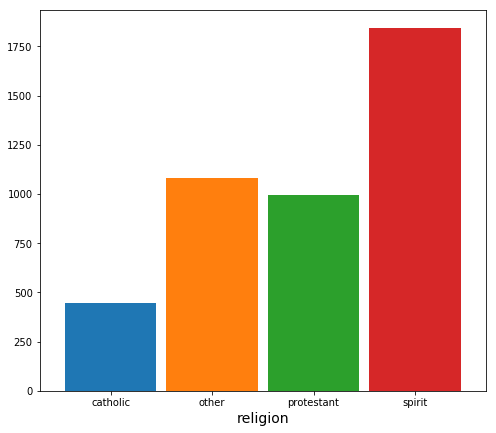

In [23]:
plt.figure(figsize(8,7))
data.groupby('religion')['religion'].agg(lambda x: len(x)).plot(kind='bar', width=0.9)
plt.xticks(rotation=0)
plt.xlabel('religion', fontsize=14)
pylab.show()

In [24]:
data.dropna().describe()

,ceb,age,educ,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.0,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000
mean,3.665758,31.835333,5.230643,5.236096,0.966739,0.657579,1.0,20.696292,5.271538,0.541439,0.172846,0.709378,0.123228,0.304253
std,2.433189,7.689567,4.223918,2.371035,0.179365,0.474649,0.0,4.973461,4.821233,0.498416,0.378217,0.454173,0.328788,0.460216
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.0,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,26.000000,0.000000,4.000000,1.000000,0.000000,1.0,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,31.000000,6.000000,5.000000,1.000000,1.000000,1.0,20.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,5.000000,37.000000,7.000000,6.000000,1.000000,1.000000,1.0,23.000000,9.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,1.0,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
data['nevermarr'] = data['agefm'].apply(lambda x : 1 if math.isnan(x) else 0)

In [26]:
data.drop(columns=['evermarr'],
          inplace=True
         )
data['agefm'] = data['agefm'].fillna(0)
data['heduc'] = data.apply(lambda x : -1 if (math.isnan(x['heduc']) and x['nevermarr']==1)  else x['heduc'], axis=1)

In [27]:
data.dropna().describe()

,ceb,age,educ,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
count,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000
mean,2.356191,27.027627,6.015787,4.600888,0.966206,0.579674,9.362852,1.837198,0.521954,0.142575,0.707943,0.095461,0.276517,0.547607
std,2.347635,8.539034,3.880874,2.213959,0.180720,0.493672,10.831724,4.500968,0.499579,0.349682,0.454765,0.293887,0.447331,0.497790
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,3.000000,3.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,7.000000,4.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,4.000000,33.000000,9.000000,6.000000,1.000000,1.000000,19.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
c = {}
c['idlnchld'] = -1.
c['heduc'] = -2.
c['usemeth'] = -1.

cols = ['idlnchld', 'heduc', 'usemeth']

for col in cols:
    data[col+'_noans'] = data[col].apply(lambda x : 1 if math.isnan(x) else 0)
    data[col] = data[col].apply(lambda x : c[col] if math.isnan(x) else x)

In [29]:
data.dropna().describe()

,ceb,age,educ,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
count,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000
mean,2.437443,27.393514,5.863155,4.466191,0.963431,0.553818,9.850736,1.730451,0.517249,0.140064,0.701702,0.092916,0.275299,0.523919,0.027139,0.028059,0.015179
std,2.401785,8.675630,3.922694,2.372879,0.187722,0.526808,10.897246,4.459982,0.499760,0.347094,0.457564,0.290348,0.446716,0.499485,0.162507,0.165160,0.122280
min,0.000000,15.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,3.000000,3.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,7.000000,4.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,33.000000,8.000000,6.000000,1.000000,1.000000,19.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
for col in data.columns.values:
    print(col)

ceb
age
educ
religion
idlnchld
knowmeth
usemeth
agefm
heduc
urban
electric
radio
tv
bicycle
nevermarr
idlnchld_noans
heduc_noans
usemeth_noans


In [31]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + radio +'\
                    'electric + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:33:11   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [32]:
print('Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


/home/lemikhovalex/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


In [33]:
m2 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + radio +'\
                    'electric + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data)
fitted = m2.fit(cov_type='HC1')
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:33:11   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [34]:
data8 = data.drop(columns=['religion', 'radio', 'tv'])
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban +'\
                    'electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data8)
fitted = m3.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.8
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:33:11   Log-Likelihood:                -7735.7
No. Observations:                4349   AIC:                         1.550e+04
Df Residuals:                    4334   BIC:                         1.560e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [35]:
print('Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


/home/lemikhovalex/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


In [36]:
data8 = data.drop(columns=['religion', 'radio', 'tv'])
m4 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban +'\
                    'electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data8)
fitted = m4.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.7
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:33:12   Log-Likelihood:                -7735.7
No. Observations:                4349   AIC:                         1.550e+04
Df Residuals:                    4334   BIC:                         1.560e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [40]:
print "F=%f, p=%f, k1=%f" % m2.fit().compare_f_test(m4.fit())

F=0.767320, p=0.595562, k1=6.000000
